<a href="https://colab.research.google.com/github/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/notebooks/Jun_Hoe_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import sqlite3

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
!curl -L -o plotting_utils.py https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/raw/refs/heads/main/src/egt309_pipeline/plotting_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9594  100  9594    0     0   9270      0  0:00:01  0:00:01 --:--:--     0


In [ ]:
from plotting_utils import plot_distribution

In [2]:
!gdown --fuzzy https://drive.google.com/file/d/17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j/view?usp=sharing
!mkdir data/
!mv bmarket.db data/

Downloading...
From: https://drive.google.com/uc?id=17S8vGBsbaAcuxgwSZLGhOOrrhfaqio7j
To: /content/bmarket.db
100% 3.15M/3.15M [00:00<00:00, 21.9MB/s]


In [3]:
con = sqlite3.connect("data/bmarket.db")
cursor = con.cursor()

In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
for row in cursor.fetchall():
    print(row)

('bank_marketing',)


In [4]:
query = "SELECT * FROM bank_marketing;"
df = pd.read_sql_query(query, con)
df.head()

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


![IMAGE of attributes of bank marketing table](https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/blob/main/EDA/images/bmarketing_attributes.png?raw=1)

## 1. Initiate Data Understanding and Insights

In [ ]:
df

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6266,58 years,retired,married,professional.course,unknown,no,no,Telephone,2,999,no
41184,11285,37 years,management,married,university.degree,no,no,no,telephone,1,999,no
41185,38159,35 years,admin.,married,high.school,no,None,no,cellular,1,4,yes
41186,861,40 years,management,married,university.degree,no,None,no,telephone,2,999,no


In [ ]:
df.info()
print("\nTable Size:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             41188 non-null  object
 3   Marital Status         41188 non-null  object
 4   Education Level        41188 non-null  object
 5   Credit Default         41188 non-null  object
 6   Housing Loan           16399 non-null  object
 7   Personal Loan          37042 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB

Table Size: (41188, 12)


In [ ]:
df.isna().sum()

,0
Client ID,0
Age,0
Occupation,0
Marital Status,0
Education Level,0
Credit Default,0
Housing Loan,24789
Personal Loan,4146
Contact Method,0
Campaign Calls,0


In [ ]:
df.duplicated().sum()

np.int64(0)

> **OBSERVATION:**
___

- Reading the bank marketing table, the dataframe has **41188 rows** and **12 columns**.

- While observing the .info(), we can see that **`Client ID`**, **`Campaign Call`** and **`Previous Contact Days`** is assigned as *Integer* type. While the remaining columns are *Object* type.

- Furthermore, the .info() also shows that all of the columns has no empty values besides **Housing Loan (24789 missing data)** and **Personal Loan (4146 missing data)**.

- There is **no duplicated data** found.

(Temp) - In addition, the table displayed shows signs of **missing data** in certain columns (e.g. `Occupation`, `Education Level`, `Credit Default`). These columns **were expected to have no empty values** based on previous statement. These missing values are refered to as *unknown*.

- The `Subscription Status` column shows values of *yes* or *no* in string type instead of *True* or *False* in boolean type.

- Lastly, the values in `Age` column seems to **contains the text *years*** after all the numeric values, which is unnecessary. While `Education Level` column has a **two part format with a '.' between two key words** (e.g. high.school, univeristy.degree). The `Occupation` column has an **admin role that ended with '.'**.



> **THOUGHT PROCESS:**
___

(Temp) 1. I need to replace all the *unknown* with *numpy NaN (np.nan)* to ensure all the missing data is captured.

2. A deeper observation into `Education Level` and `Occupation` columns is required to get a better understanding before cleaning.

3. I can remove *years* from the values in `Age` column and change the data type to *Integer*.

4. I can convert `Subscription Status` column into boolean type, with values of *True* or *False*, since the attribute says the column is defines as "Whether the client subscribed or not".

#### Temp (1a. Replace *unknown* and *None* with np.nan)

In [ ]:
replace_with_nan = ["unknown", None]
df.replace(replace_with_nan, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Client ID              41188 non-null  int64 
 1   Age                    41188 non-null  object
 2   Occupation             40858 non-null  object
 3   Marital Status         41108 non-null  object
 4   Education Level        39457 non-null  object
 5   Credit Default         32591 non-null  object
 6   Housing Loan           16006 non-null  object
 7   Personal Loan          36165 non-null  object
 8   Contact Method         41188 non-null  object
 9   Campaign Calls         41188 non-null  int64 
 10  Previous Contact Days  41188 non-null  int64 
 11  Subscription Status    41188 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.8+ MB


In [ ]:
df.isna().sum()

,0
Client ID,0
Age,0
Occupation,330
Marital Status,80
Education Level,1731
Credit Default,8597
Housing Loan,25182
Personal Loan,5023
Contact Method,0
Campaign Calls,0


In [ ]:
df.duplicated().sum()

np.int64(0)

> **Observation:**
___


#### Graph Plot Functions

In [209]:
def plot_bar_graph(df, col, y=None, kind="bar", figsize=(8, 5), top=None, title=None, ascending=False, x_rotation=0, legend=True):
  """
  Plot a bar graph for the input data.

  Parameters
  ----------
  df    : DataFrame
  col   : name of column for x-axis
  y     : name of column for y-axis (only for 'bar')
  kind: 'bar' (Default) or 'count'
    bar:    plot bar graph
    count:  plot count graph
  """
  if kind == "count":
        counts = df[col].value_counts(ascending=ascending).reset_index()
        total = counts['count'].sum()
        counts['label_text'] = counts.apply(lambda row: f"{row['count']} ({row['count']/total*100:.1f}%)", axis=1)

        plot_df = counts if top is None else counts.head(top)

        fig = px.bar(
            plot_df,
            x=col,
            y='count',
            text='label_text',
            color=col
        )

  elif kind == "bar":
      if y is None:
          raise ValueError("y must be provided for barplot")
      plot_df = df if top is None else df.head(top)

      fig = px.bar(
          plot_df,
          x=col,
          y=y,
          text=y,
          color=col
      )

  else:
      raise ValueError("kind must be 'bar' or 'count'")

  fig.update_traces(textposition='outside')
  fig.update_layout(
      title=title if title else f"{kind.capitalize()} plot of {col}",
      xaxis_title=col,
      yaxis_title=y if kind == "bar" else "Frequency",
      xaxis_tickangle=x_rotation,
      showlegend=legend,
      width=figsize[0]*100,
      height=figsize[1]*100
  )
  fig.show()

def plot_hist_graph(df, col, bins=None, figsize=(8, 5), top=None, title=None, x_rotation=0):
  """
  Plot a histogram graph for the input data.

  Parameters
  ----------
  df    : DataFrame
  col   : name of column for x-axis
  bins  : number of bins for the historgram
  """
  fig = px.histogram(
        df,
        x=col,
        nbins=bins,
        text_auto=False
    )

  fig.update_layout(
      title=title if title else f"Histogram of {col}",
      xaxis_title=col,
      yaxis_title="Frequency",
      xaxis_tickangle=x_rotation,
      showlegend=False,
      width=figsize[0]*100,
      height=figsize[1]*100
  )
  fig.update_xaxes(
      tickmode='linear',
      dtick=10,
      showgrid=True
  )

  fig.show()

#### 1b. Understanding Column data by Columns and insights

##### `Client ID` Column

In [ ]:
print("Number of unique values:", df["Client ID"].nunique())

Number of unique values: 41188


> **OBSERVATION:**
___

- All rows/entries are uniquely identified by the Client ID.
- No repeated Client ID throughout data.

> **THINKING PROCESS:**
___

1. `Client ID` column can be remove as it serves no predicting values and contribute to high dimensionality issue in input data.

##### `Age` Column

In [ ]:
display(df["Age"].describe())
print("List all unique values:\n", df["Age"].sort_values().unique())

,Age
count,41188
unique,77
top,150 years
freq,4197


List all unique values:
 ['150 years' '17 years' '18 years' '19 years' '20 years' '21 years'
 '22 years' '23 years' '24 years' '25 years' '26 years' '27 years'
 '28 years' '29 years' '30 years' '31 years' '32 years' '33 years'
 '34 years' '35 years' '36 years' '37 years' '38 years' '39 years'
 '40 years' '41 years' '42 years' '43 years' '44 years' '45 years'
 '46 years' '47 years' '48 years' '49 years' '50 years' '51 years'
 '52 years' '53 years' '54 years' '55 years' '56 years' '57 years'
 '58 years' '59 years' '60 years' '61 years' '62 years' '63 years'
 '64 years' '65 years' '66 years' '67 years' '68 years' '69 years'
 '70 years' '71 years' '72 years' '73 years' '74 years' '75 years'
 '76 years' '77 years' '78 years' '79 years' '80 years' '81 years'
 '82 years' '83 years' '84 years' '85 years' '86 years' '88 years'
 '89 years' '91 years' '92 years' '95 years' '98 years']


In [134]:
plot_bar_graph(df, col="Age", y="Frequency", kind="count", title="Age Distribution", top=10, x_rotation=-55, legend=False)

In [ ]:
print(
    "Percentage of 150 years old: {:.5f}%".format(
        df[df["Age"] == "150 years"].shape[0] / df.shape[0] * 100
    )
)

Percentage of 150 years old: 10.18986%


> **OBSERVATION:**
___

- "150 years" !!! Most likely a recorded error.
- The value "150 years" has the highest frequency by a large margin compared to other ages.
- The values in `Age` column do **contains the text *years*** after all the numeric values, which is a data type issue.

> **THINKING PROCESS**
___

- I can remove *years* from the values in `Age` column.
- Convert the data type to *Integer*.
- Plot histogram to get better insights.
- Possibly impute the "150 years" with simple imputation (mean or median)

##### `Occupation` Column

In [5]:
display(df["Occupation"].describe())
print("List all unique values:\n", df["Occupation"].sort_values().unique())

,Occupation
count,41188
unique,12
top,admin.
freq,10422


List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [166]:
plot_bar_graph(df, col="Occupation", y="Frequency", kind="count", title="Occupation Distribution", x_rotation=-55, legend=True)

In [ ]:
print(
    "Percentage of unknown: {:.2f}%".format(
        df[df["Occupation"] == "unknown"].shape[0] / df.shape[0] * 100
    )
)

Percentage of unknown: 0.80%


> **Observation:**
___

- It is a Nominal Category
- Possible to one-hot or integer encode to feed into machine learning
- unknown only made out of 0.8% of the column.

> **THINKING PROCESS**
___

- unknown is only 0.8%, which can afford to remove the row with the unknown in this column.


##### `Marital Status` Column

In [ ]:
display(df["Marital Status"].describe())
print("List all unique values:\n", df["Marital Status"].sort_values().unique())

,Marital Status
count,41188
unique,4
top,married
freq,24928


List all unique values:
 ['divorced' 'married' 'single' 'unknown']


In [165]:
plot_bar_graph(df, col="Marital Status", y="Frequency", kind="count", title="Marital Status Distribution", x_rotation=-55, legend=True)

In [ ]:
print(
    "Percentage of unknown: {:.2f}%".format(
        df[df["Marital Status"] == "unknown"].shape[0] / df.shape[0] * 100
    )
)

Percentage of unknown: 0.19%


> **Observation:**
___

- This is a Nominal Category
- Most client are Married, second most are Singles
- The third are Divorced
- unknown only made out of 0.17% of the column.

> **THINKING PROCESS**
___

- unknown is only 0.17%, which can afford to remove the row with the unknown in this column.

##### `Education Level` Column

In [ ]:
display(df["Education Level"].describe())
print("List all unique values:\n", df["Education Level"].sort_values().unique())

,Education Level
count,41188
unique,8
top,university.degree
freq,12168


List all unique values:
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


In [164]:
plot_bar_graph(df, col="Education Level", y="Frequency", kind="count", title="Education Level Distribution", x_rotation=-55, legend=True)

In [ ]:
print("Percentage of unknown: {:.2f}%".format(df[df["Education Level"] == "unknown"].shape[0] / df.shape[0] * 100))

Percentage of unknown: 4.20%


> **Observation:**
___

- This is a Nominal Category
- Top are university, second highest is high school.
- Third is clients with 9 years of basic studies.
- unknown is made out of 3.91% in the column.

> **THINKING PROCESS**
___

- unknown is 3.91%, which cannot be drop since it can lose a meaning.
- Should be treated as a category since it may provide informative insights.

##### `Credit Default` Column

In [ ]:
display(df["Credit Default"].describe())
print("List all unique values:\n", df["Credit Default"].sort_values().unique())

,Credit Default
count,41188
unique,3
top,no
freq,32588


List all unique values:
 ['no' 'unknown' 'yes']


In [163]:
plot_bar_graph(df, col="Credit Default", y="Frequency", kind="count", title="Credit Default Distribution", x_rotation=-55, legend=True)

In [ ]:
print("Percentage of yes: {:.5f}%".format(df[df["Credit Default"] == "yes"].shape[0] / df.shape[0] * 100))
print("Percentage of unknown: {:.5f}%".format(df[df["Credit Default"] == "unknown"].shape[0] / df.shape[0] * 100))
print("Percentage of no: {:.5f}%".format(df[df["Credit Default"] == "no"].shape[0] / df.shape[0] * 100))

Percentage of yes: 0.00728%
Percentage of unknown: 20.87258%
Percentage of no: 79.12013%


> **Observation:**
___

- The amount of "yes" is way too little and most are "no" (80%).
- 20% is unknown, which shows no information.

> **THOUGHT PROCESS:**
___

- Can drop `Credit Default` column since majority disagree with credit default and only 0.007% agrees to it.
- Meaning it is severely imbalanced, where the column is unclassifiable.
- Especially, unknown made out of 20% which is uninformative.

##### `Housing Loan` Column

In [ ]:
display(df["Housing Loan"].describe())
print("List all unique values:\n", df["Housing Loan"].sort_values().unique())

,Housing Loan
count,16399
unique,3
top,yes
freq,8595


List all unique values:
 ['no' 'unknown' 'yes' None]


In [162]:
plot_bar_graph(df, col="Housing Loan", y="Frequency", kind="count", title="Housing Loan Distribution", x_rotation=-55, legend=True)

In [142]:
print(
    "Percentage of unknown (**include None in total frequency**): {:.5f}%".format(
        df[df["Housing Loan"] == "unknown"].shape[0] / df.shape[0] * 100
    )
)
print(
    "Percentage of None: {:.5f}%".format(
        df[df["Housing Loan"].isna()].shape[0] / df.shape[0] * 100
    )
)

Percentage of unknown (**include None in total frequency**): 0.95416%
Percentage of None: 60.18501%


> **Observation:**
___

- There is a very high percentage of missing values (60%) in the column.
- Excluding rows with None in Housing Loan column:
  - The number of "Yes" is the highest with 52.4% and "No" is second highest with 45.2%.
  - There is 2.4% of unknown which is the lowest.

> **THOUGHT PROCESS:**
___

- 60% is an extremely large gap for missing values.
- There is two method come to mind:
  - Drop the entire column
  - Attempt to impute it with possibly model-based imputation. Since Housing Loan may provide good insights and patterns to predict Subscription Status.

##### `Personal Loan` Column

In [ ]:
display(df["Personal Loan"].describe())
print("List all unique values:\n", df["Personal Loan"].sort_values().unique())

,Personal Loan
count,37042
unique,3
top,no
freq,30532


List all unique values:
 ['no' 'unknown' 'yes' None]


In [161]:
plot_bar_graph(df, col="Personal Loan", y="Frequency", kind="count", title="Personal Loan Distribution", x_rotation=-55, legend=True)

In [171]:
print("Percentage of unknown (**include None in total frequency**): {:.5f}%".format(df[df["Personal Loan"] == "unknown"].shape[0] / df.shape[0] * 100))
print("Percentage of None: {:.5f}%".format(df[df["Personal Loan"].isna()].shape[0]/df.shape[0]*100))
print("Number of rows of None: {}".format(df[df["Personal Loan"].isna()].shape[0]))

Percentage of unknown (**include None in total frequency**): 2.12926%
Percentage of None: 10.06604%
Number of rows of None: 4146


> **Observation:**
___

- There is a relatively low percentage of missing values (10%) in the column.
- Excluding rows with None in Personal Loan column
  - The number of "No" is the highest with 82.4% and "Yes" is second highest with 15.2%.
  - There is 2.4% of unknown which is the lowest.

> **THOUGHT PROCESS:**
___

- Although missing values make up of only 10%, dropping them may not be ideal as it represents quite a significant number of rows.
- Imputation could be a better approach to retain as much data as possible while handling missing entries.

##### `Contact Method` Column

In [ ]:
display(df["Contact Method"].describe())
print("List all unique values:\n", df["Contact Method"].sort_values().unique())

,Contact Method
count,41188
unique,4
top,Cell
freq,13100


List all unique values:
 ['Cell' 'Telephone' 'cellular' 'telephone']


In [160]:
plot_bar_graph(df, col="Contact Method", y="Frequency", kind="count", title="Contact Method Distribution", x_rotation=-55, legend=True)

> **Observation:**
___

- Repeated and inconsistent formats:
  - Cell and cellular
  - Telephone and telephone
- This is a Nominal category

> **THOUGHT PROCESS:**
___

- Replace all Cell with cellular
- Replace all Telephone with telephone

##### `Campaign Calls` Column

In [ ]:
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

,Campaign Calls
count,41188.000000
mean,2.051374
std,3.171345
min,-41.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


List all unique values:
 [-41 -35 -32 -29 -28 -25 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12
 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  37  39  40  42  43  56]


In [210]:
# Freedman–Diaconis rule
q75, q25 = np.percentile(df['Campaign Calls'], [75, 25])
bin_width = 2 * (q75 - q25) * len(df)**(-1/3)
bins = int((df['Campaign Calls'].max() - df['Campaign Calls'].min()) / bin_width)

plot_hist_graph(df, col="Campaign Calls", bins=bins, x_rotation=0)

> **Observation:**
___

- There is negative values in the column.
- There is a good and symmetric distribution from range -41 to 56, with a single peak at 1 calls.
- There is **No** 0 calls.

> **THOUGHT PROCESS:**
___

- Highly doubt that the negative values are valid:
  - The definition given is "*Total number* of contacts performed for this campaign and this client, including the last contact".
  - The calls are very evenly distributed, meaning that it is mirrored.
- Possible solution:
  1. Absolute the negative to turn to positive.
  2. Add another column to retain the negative meaning, together with Solution #1.


##### `Previous Contact Days` Column

In [ ]:
display(df[df["Previous Contact Days"] != 999]["Previous Contact Days"].describe())
print("List all unique values:\n", df["Previous Contact Days"].sort_values().unique())

,Previous Contact Days
count,1515.000000
mean,6.014521
std,3.824906
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,27.000000


List all unique values:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  25  26  27 999]


In [154]:
plot_bar_graph(df[df["Previous Contact Days"] != 999], col="Previous Contact Days", y="Frequency", kind="count", title="Previous Contact Days Distribution", figsize=(12, 5), x_rotation=-55, legend=False)

<Axes: xlabel='Previous Contact Days'>

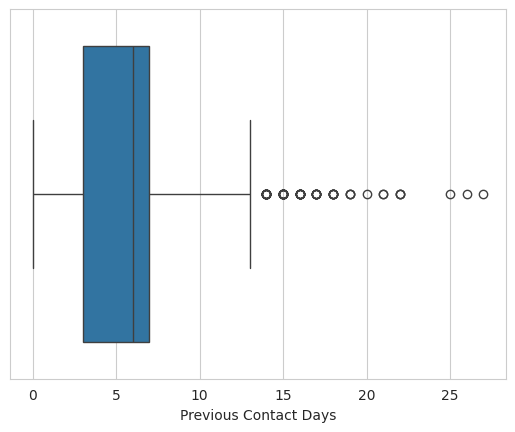

In [168]:
sns.boxplot(
    x=df[df["Previous Contact Days"] != 999]["Previous Contact Days"].sort_values()
)

In [169]:
print(
    "Percentage of 999: {:.5f}%".format(
        df[df["Previous Contact Days"] == 999].shape[0] / df.shape[0] * 100
    )
)

Percentage of 999: 96.32174%


> **Observation:**
___

-

> **THOUGHT PROCESS:**
___

-

##### `Subscription Status` Column

In [ ]:
display(df["Subscription Status"].describe())
print("List all unique values:\n", df["Subscription Status"].sort_values().unique())

,Subscription Status
count,41188
unique,2
top,no
freq,36548


List all unique values:
 ['no' 'yes']


In [159]:
plot_bar_graph(df, col="Subscription Status", y="Frequency", kind="count", title="Subscription Status Distribution", x_rotation=-55, legend=True)

> **Observation:**
___

- The column is very imbalance.

> **THOUGHT PROCESS:**
___

- Convert to Boolean data type
- Use Stratify when splitting the dataset for model training to ensure balance yes and no

## Data Preparation

#### Data Cleaning

##### Data Cleaning on `Client ID` Column

In [ ]:
df.drop("Client ID", axis=1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no


##### Data Cleaning on `Age` Column

In [ ]:
df["Age"] = df["Age"].map(lambda x: x.split()[0])
df["Age"] = df["Age"].astype(int)
df["Age"]

,Age
0,57
1,55
2,33
3,36
4,27
...,...
41183,58
41184,37
41185,35
41186,40


<Axes: >

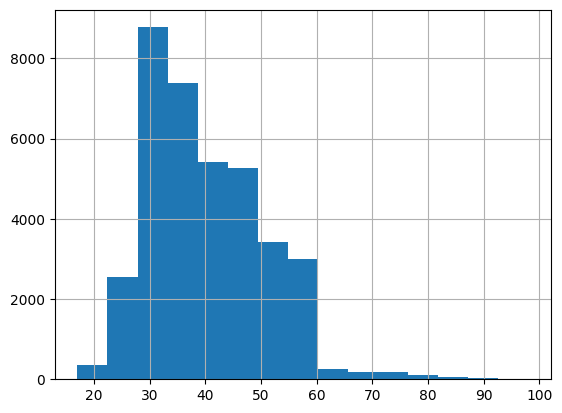

In [ ]:
fig = df["Age"][df["Age"] != 150].hist(bins=15)
fig

##### Data Cleaning on `Occupation` Column

In [ ]:
df.drop(df[df["Occupation"] == "unknown"].index, axis=0, inplace=True)
print("List all unique values:\n", df["Occupation"].sort_values().unique())
print("New Shape: ", df.shape)

List all unique values:
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
New Shape:  (40858, 11)


##### Data Cleaning on `Marital Status` Column

In [ ]:
df.drop(df[df["Marital Status"] == "unknown"].index, axis=0, inplace=True)
print("List all unique values:\n", df["Marital Status"].sort_values().unique())
print("New Shape: ", df.shape)

List all unique values:
 ['divorced' 'married' 'single']
New Shape:  (40787, 11)


##### Data Cleaning on `Credit Default` Column

In [ ]:
df.drop("Credit Default", axis=1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,57,technician,married,high.school,no,yes,Cell,1,999,no
2,33,blue-collar,married,basic.9y,no,no,cellular,1,999,no
3,36,admin.,married,high.school,no,no,Telephone,4,999,no
4,27,housemaid,married,high.school,None,no,Cell,2,999,no
5,58,retired,married,professional.course,None,yes,Cell,1,999,no


##### Data Cleaning on `Contact Method` Column

In [ ]:
df["Contact Method"].replace(
    ["Cell", "Telephone"], ["cellular", "telephone"], inplace=True
)

<Axes: xlabel='Contact Method', ylabel='Frequency'>

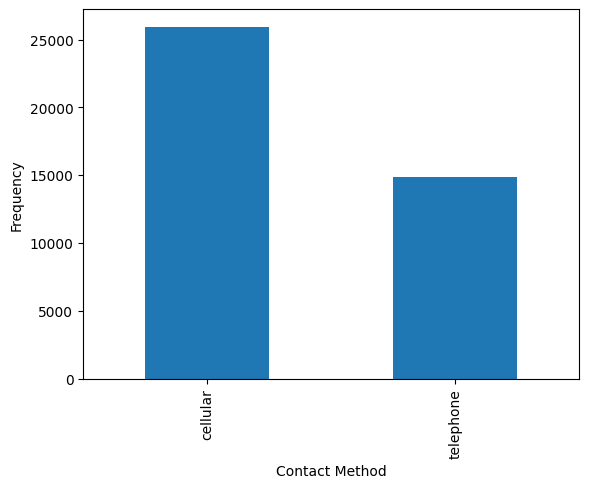

In [ ]:
df["Contact Method"].value_counts().plot(kind="bar", ylabel="Frequency")

##### Data Cleaning on `Campaign Calls` Column

In [ ]:
df["Campaign Calls"] = df["Campaign Calls"].apply(lambda x: abs(x))
display(df["Campaign Calls"].describe())
print("List all unique values:\n", df["Campaign Calls"].sort_values().unique())

,Campaign Calls
count,40787.000000
mean,2.566112
std,2.768103
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


List all unique values:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 37 39 40 41 42 43 56]


In [ ]:
plot_distribution(df, col_name="Campaign Calls")

##### Data Cleaning on `Previously Contacted` Column

In [ ]:
df["Previously Contacted"] = df["Previous Contact Days"] != 999
df.replace({"Previous Contact Days": 999}, -1, inplace=True)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status,Previously Contacted
0,57,technician,married,high.school,no,yes,cellular,1,-1,no,False
2,33,blue-collar,married,basic.9y,no,no,cellular,1,-1,no,False
3,36,admin.,married,high.school,no,no,telephone,4,-1,no,False
4,27,housemaid,married,high.school,None,no,cellular,2,-1,no,False
5,58,retired,married,professional.course,None,yes,cellular,1,-1,no,False


In [ ]:
columns = df.columns.tolist()
columns.remove("Subscription Status")
columns.append("Subscription Status")
df = df.reindex(columns=columns)
df.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,technician,married,high.school,no,yes,cellular,1,-1,False,no
2,33,blue-collar,married,basic.9y,no,no,cellular,1,-1,False,no
3,36,admin.,married,high.school,no,no,telephone,4,-1,False,no
4,27,housemaid,married,high.school,None,no,cellular,2,-1,False,no
5,58,retired,married,professional.course,None,yes,cellular,1,-1,False,no


`Previously Contacted`: False means no contact | True means there is contact

`Previous Contact Days`: 999 converted to -1

##### Data Cleaning on `Subscription Status` Column

In [ ]:
df["Subscription Status"].replace({"yes": 1, "no": 0}, inplace=True)
df["Subscription Status"] = df["Subscription Status"].astype(bool)
df.dtypes

,0
Age,int64
Occupation,object
Marital Status,object
Education Level,object
Housing Loan,object
Personal Loan,object
Contact Method,object
Campaign Calls,int64
Previous Contact Days,int64
Previously Contacted,bool


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    40787 non-null  int64 
 1   Occupation             40787 non-null  object
 2   Marital Status         40787 non-null  object
 3   Education Level        40787 non-null  object
 4   Housing Loan           16243 non-null  object
 5   Personal Loan          36679 non-null  object
 6   Contact Method         40787 non-null  object
 7   Campaign Calls         40787 non-null  int64 
 8   Previous Contact Days  40787 non-null  int64 
 9   Previously Contacted   40787 non-null  bool  
 10  Subscription Status    40787 non-null  bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 3.2+ MB


#### Simple Data Imputation Analysis

##### Simple Imputation on `Age` Column

In [ ]:
df_not_150 = df[df["Age"] != 150]["Age"]
df_mean_rp = df["Age"].apply(lambda x: df_not_150.agg("mean") if x == 150 else x)
df_mean_rp.head()

,Age
0,57.0
2,33.0
3,36.0
4,27.0
5,58.0


<Axes: >

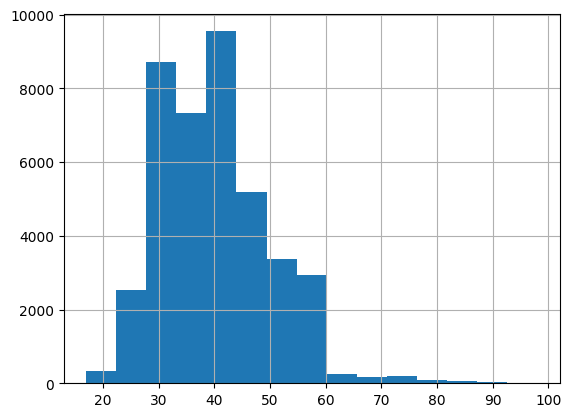

In [ ]:
fig = df_mean_rp.hist(bins=15)
fig

In [ ]:
df_not_150 = df[df["Age"] != 150]["Age"]
df_median_rp = df["Age"].apply(lambda x: df_not_150.agg("median") if x == 150 else x)
df_median_rp.head()

,Age
0,57.0
2,33.0
3,36.0
4,27.0
5,58.0


<Axes: >

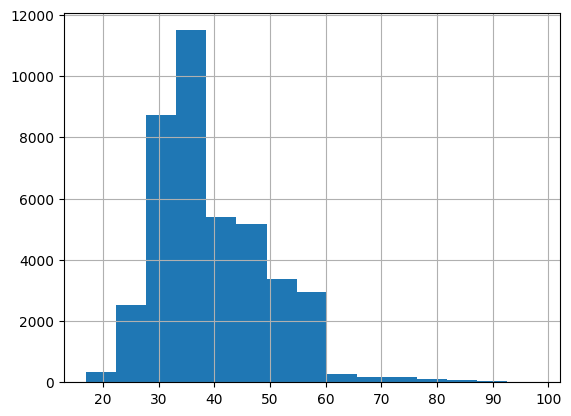

In [ ]:
fig = df_median_rp.hist(bins=15)
fig

#### Check relationships

In [ ]:
encoder = LabelEncoder()

In [ ]:
def encoder_fn(df):
    df_copy = df.copy()
    df_encode = pd.DataFrame()
    for col in df_copy.columns:
        if df_copy[col].dtype == "object":
            df_encode[col] = encoder.fit_transform(df_copy[col])
        else:
            df_encode[col] = df_copy[col]
    return df_encode

##### Mutual Information (MI) of Housing Loan

In [ ]:
df_encode = encoder_fn(df)
df_encode.head()

,Age,Occupation,Marital Status,Education Level,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,40,9,1,3,0,2,0,0,0,0,0
1,16,1,1,2,0,0,0,0,0,0,0
2,19,0,1,3,0,0,1,3,0,0,0
3,10,3,1,3,3,0,0,1,0,0,0
4,41,5,1,5,3,2,0,0,0,0,0


In [ ]:
target = "Housing Loan"
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    40787 non-null  int64
 1   Occupation             40787 non-null  int64
 2   Marital Status         40787 non-null  int64
 3   Education Level        40787 non-null  int64
 4   Personal Loan          40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  int64
 9   Subscription Status    40787 non-null  int64
dtypes: int64(10)
memory usage: 3.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 40787 entries, 0 to 40786
Series name: Housing Loan
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 318.8 KB
None


In [ ]:
mi_scores = mutual_info_classif(X_df, y)

In [ ]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi.rename(target).sort_values(ascending=False)

,Housing Loan
Personal Loan,0.041213
Marital Status,0.002581
Age,0.002383
Previous Contact Days,0.001110
Education Level,0.001028
Occupation,0.000000
Contact Method,0.000000
Campaign Calls,0.000000
Previously Contacted,0.000000
Subscription Status,0.000000


##### Mutual Information (MI) of Personal Loan

In [ ]:
df_encode = encoder_fn(df)
target = "Personal Loan"
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    40787 non-null  int64
 1   Occupation             40787 non-null  int64
 2   Marital Status         40787 non-null  int64
 3   Education Level        40787 non-null  int64
 4   Housing Loan           40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  int64
 9   Subscription Status    40787 non-null  int64
dtypes: int64(10)
memory usage: 3.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 40787 entries, 0 to 40786
Series name: Personal Loan
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 318.8 KB
None


In [ ]:
mi_scores = mutual_info_classif(X_df, y)

In [ ]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi.rename(target).sort_values(ascending=False)

,Personal Loan
Housing Loan,0.042395
Marital Status,0.002970
Education Level,0.002445
Subscription Status,0.002426
Contact Method,0.001754
Previously Contacted,0.000991
Age,0.000846
Previous Contact Days,0.000839
Occupation,0.000394
Campaign Calls,0.000000


##### Mutual Information (MI) of Age

In [ ]:
df_encode = encoder_fn(df)
target = "Age"
X_df, y = df_encode.drop(target, axis=1), df_encode[target]
print(X_df.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Occupation             40787 non-null  int64
 1   Marital Status         40787 non-null  int64
 2   Education Level        40787 non-null  int64
 3   Housing Loan           40787 non-null  int64
 4   Personal Loan          40787 non-null  int64
 5   Contact Method         40787 non-null  int64
 6   Campaign Calls         40787 non-null  int64
 7   Previous Contact Days  40787 non-null  int64
 8   Previously Contacted   40787 non-null  int64
 9   Subscription Status    40787 non-null  int64
dtypes: int64(10)
memory usage: 3.1 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 40787 entries, 0 to 40786
Series name: Age
Non-Null Count  Dtype
--------------  -----
40787 non-null  int64
dtypes: int64(1)
memory usage: 318.8 KB
None


In [ ]:
mi_scores = mutual_info_classif(X_df, y)

In [ ]:
mi = pd.Series(mi_scores)
mi.index = X_df.columns
mi.rename(target).sort_values(ascending=False)

,Age
Occupation,0.144726
Marital Status,0.113684
Education Level,0.048512
Subscription Status,0.010902
Personal Loan,0.006061
Contact Method,0.005791
Previously Contacted,0.003738
Housing Loan,0.001806
Previous Contact Days,0.000069
Campaign Calls,0.000000


#### Decided Missing Data Solution for Age, Housing Loan & Personal Loan

In [ ]:
df.drop("Housing Loan", axis=1, inplace=True)

In [ ]:
def random_distribution(df):
  df_temp = df.copy()
  targets = {"Age":150,"Personal Loan":"none"}
  if not isinstance(df, pd.DataFrame):
    raise TypeError("Submitted dataframe is not a pd.DataFrame")
  for target, val in targets.items():
    col = df_temp[target]
    if val == "none":
      temp_col = col[~col.isna()]
      tobe_fill = col.isna()
    else:
      temp_col = col[col!=val]
      tobe_fill = (col==val)
    distribution = temp_col.value_counts(normalize=True).tolist()
    labels = temp_col.value_counts().index.tolist()
    fill_mask = tobe_fill
    fill = np.random.choice(labels, size=fill_mask.sum(), p=distribution)
    df_temp.loc[fill_mask, target] = fill
  return df_temp

In [ ]:
df_new = random_distribution(df)
df_new.head()

,Age,Occupation,Marital Status,Education Level,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Previously Contacted,Subscription Status
0,57,technician,married,high.school,yes,cellular,1,-1,False,False
2,33,blue-collar,married,basic.9y,no,cellular,1,-1,False,False
3,36,admin.,married,high.school,no,telephone,4,-1,False,False
4,27,housemaid,married,high.school,no,cellular,2,-1,False,False
5,58,retired,married,professional.course,yes,cellular,1,-1,False,False


In [ ]:
df_new["Age"][df_new["Age"]==150].sum()

np.int64(0)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40787 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    40787 non-null  int64 
 1   Occupation             40787 non-null  object
 2   Marital Status         40787 non-null  object
 3   Education Level        40787 non-null  object
 4   Personal Loan          40787 non-null  object
 5   Contact Method         40787 non-null  object
 6   Campaign Calls         40787 non-null  int64 
 7   Previous Contact Days  40787 non-null  int64 
 8   Previously Contacted   40787 non-null  bool  
 9   Subscription Status    40787 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 2.9+ MB


In [ ]:
# Old Personal Loan
print(df["Personal Loan"].unique())
df["Personal Loan"].value_counts(normalize=True)

['yes' 'no' None 'unknown']


,proportion
Personal Loan,
no,0.824150
yes,0.152076
unknown,0.023774


In [ ]:
# New Personal Loan
print(df_new["Personal Loan"].unique())
df_new["Personal Loan"].value_counts(normalize=True)

['yes' 'no' 'unknown']


,proportion
Personal Loan,
no,0.824135
yes,0.152475
unknown,0.023390


## Save Dataframe

In [ ]:
df_new.to_csv('data/df_bmarket.csv')

## Pipeline function preparation

In [ ]:
def random_distribution(df, target, val="none"):
  df_temp = df.copy()
  col = df_temp[target]
  if val == "none":
    temp_col = col[~col.isna()]
    tobe_fill = col.isna()
  else:
    temp_col = col[col!=val]
    tobe_fill = (col==val)
  distribution = temp_col.value_counts(normalize=True).tolist()
  labels = temp_col.value_counts().index.tolist()
  fill_mask = tobe_fill
  fill = np.random.choice(labels, size=fill_mask.sum(), p=distribution)
  df_temp.loc[fill_mask, target] = fill
  return df_temp

def reindex_target_col(df):
  cols = df.columns.tolist()
  cols.remove("Subscription Status")
  cols.append("Subscription Status")
  df_reorganized = df.reindex(columns=cols)
  return df_reorganized

def clean_clientId(df):
  df_new = df.drop("Client ID", axis=1)
  return df_new

def clean_age(df):
  df_temp = df.copy()
  df_temp["Age"] = df_temp["Age"].map(lambda x: x.split()[0])
  df_temp["Age"] = df_temp["Age"].astype(int)
  df_new = random_distribution(df_temp, target="Age", val=150)
  return df_new

def clean_occupation(df):
  df_new = df.drop(df[df["Occupation"] == "unknown"].index, axis=0)
  return df_new

def clean_maritalStatus(df):
  df_new = df.drop(df[df["Marital Status"] == "unknown"].index, axis=0)
  return df_new

def clean_creditDefault(df):
  df_new = df.drop("Credit Default", axis=1)
  return df_new

def clean_housingLoan(df):
  df_new = df.drop("Housing Loan", axis=1)
  return df_new

def clean_personalLoan(df):
  df_temp = df.copy()
  df_new = random_distribution(df_temp, target="Personal Loan")
  return df_new

def clean_contactMethod(df):
  df_new = df.copy()
  df_new["Contact Method"].replace(["Cell", "Telephone"], ["cellular", "telephone"], inplace=True)
  return df_new

def clean_campaignCalls(df):
  df_new = df.copy()
  df_new["Campaign Calls"] = df_new["Campaign Calls"].apply(lambda x: abs(x))
  return df_new

def clean_previousContactDays(df):
  df_new = df.copy()
  df_new["Previously Contacted"] = df_new["Previous Contact Days"] != 999
  df_new.replace({"Previous Contact Days": 999}, -1, inplace=True)
  df_new = reindex_target_col(df_new)
  return df_new

def clean_subscriptionStatus(df):
  df_new = df.copy()
  df_new["Subscription Status"].replace({"yes": 1, "no": 0}, inplace=True)
  df_new["Subscription Status"] = df_new["Subscription Status"].astype(bool)
  return df_new